In [1]:
import pandas as pd
import numpy as np
import glob, os, sys
import time
import pickle
import datetime

In [2]:
df = pd.read_csv('finalset/patient_data_48_hours.csv')
df.head(50)

,SUBJECT_ID,TimeStamp,Albumin,Alk. Phosphate,ALT,AST,Total Bili,BUN,Cholesterol,Creatinine,...,Platelets,Respiratory Rate,SaO2,Arterial BP [Systolic],Temperature C,TroponinI,TroponinT,Urine,WBC,Previous WeightF
0,17,0 days 00:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.009424,...,0.103116,0.143564,0.990099,0.445489,0.0,0.0,0.0,0.0,0.021739,0.000000
1,17,1 days 03:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.267327,0.940594,0.406015,0.0,0.0,0.0,0.0,0.040076,0.000000
2,17,1 days 04:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.207921,0.940594,0.379699,0.0,0.0,0.0,0.0,0.040076,0.000000
3,17,1 days 05:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.217822,0.980198,0.413534,0.0,0.0,0.0,0.0,0.040076,0.000000
4,17,1 days 06:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.178218,0.980198,0.406015,0.0,0.0,0.0,0.0,0.040076,0.000000
5,17,1 days 07:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.158416,0.980198,0.349624,0.0,0.0,0.0,0.0,0.040076,0.000000
6,17,1 days 08:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.158416,0.980198,0.349624,0.0,0.0,0.0,0.0,0.040076,0.000000
7,17,1 days 09:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.000000
8,17,1 days 10:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.000000
9,17,1 days 11:00:00.000000000,0.0,0.000000,0.000000,0.000000,0.0,0.060606,0.0,0.008377,...,0.188427,0.188119,0.980198,0.375940,0.0,0.0,0.0,0.0,0.040076,0.000000


In [3]:
matrix3D = np.array(df.drop(['SUBJECT_ID', 'TimeStamp'], 1))
matrix3D

array([[0.        , 0.        , 0.        , ..., 0.        , 0.02173913,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04007561,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04007561,
        0.        ],
       ...,
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01587902,
        0.        ],
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01039698,
        0.        ],
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01342155,
        0.        ]])

In [4]:
matrix3D.shape

(322763, 37)

In [5]:
matrix3D = np.array(matrix3D).reshape((6587, 49, 37))
matrix3D.shape

(6587, 49, 37)

In [6]:
outcomes = pd.read_csv('finalset/outcomes.csv')
outcomes.head(10)

,SUBJECT_ID,LABEL
0,17,0
1,21,0
2,23,0
3,34,0
4,36,1
5,61,0
6,68,1
7,85,0
8,94,0
9,103,1


In [7]:
Y = np.array(outcomes.drop(['SUBJECT_ID'], 1))
Y.shape

(6587, 1)

In [8]:
X = matrix3D
X.shape

(6587, 49, 37)

In [10]:
X_train = X[:5500]
X_test = X[5500:]
Y_train = Y[:5500]
Y_test = Y[5500:]
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(5500, 49, 37)

(1087, 49, 37)

(5500, 1)

(1087, 1)

In [17]:
import pickle
with open('finalset/datasets_16times.pickle', 'rb') as handle:
    [X_train,  Y_train,X_test,Y_test] = pickle.load(handle)
    print("yes")
print("here")

yes
here


In [18]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(95000, 98, 30)

(10392, 98, 30)

(95000, 1)

(10392, 1)

In [19]:
X_train = X_train[:47000]
Y_train = Y_train[:47000]
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(47000, 98, 30)

(10392, 98, 30)

(47000, 1)

(10392, 1)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,RepeatVector,TimeDistributed,Conv1D,MaxPooling1D
from keras.utils import plot_model

In [40]:
model = Sequential()
model.add(Conv1D(32, kernel_size=5, input_shape=(X_train.shape[1],X_train.shape[2]), activation='relu', padding='same',data_format="channels_last"))
model.add(Conv1D(32, 5, activation='tanh', padding='same'))
model.add(Conv1D(64, 5, activation='tanh', padding='same'))
model.add(MaxPooling1D(pool_size=2,data_format="channels_first"))
model.add(LSTM(100, activation='tanh',input_shape=(98,32),return_sequences=True))
model.add(LSTM(100, activation='tanh'))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.2))
#model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(Dense(100,activation='tanh'))
model.add(Dense(25,activation='tanh'))
#model.add(Dense(20,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,batch_size=1000,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 98, 32)            4832      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 98, 32)            5152      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 98, 64)            10304     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 98, 100)           53200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 100)               80400     
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 98, 100)           0         
__________

In [41]:
scores = model.evaluate(X_test, Y_test)
scores[1]*100

10392/10392 [==============================] - 25s 2ms/step


85.11354888375674

In [42]:
y_pred = model.predict(X_test)
y_pred

array([[0.9284574 ],
       [0.00836998],
       [0.6324878 ],
       ...,
       [0.00813705],
       [0.30532524],
       [0.9853834 ]], dtype=float32)

In [43]:
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd;
import numpy as np;
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, f1_score,precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [44]:
score = 1.0 - roc_auc_score(Y_test, y_pred)



display(score)


f_score=f1_score(Y_test,y_pred.round())

display(f_score)





prfs=precision_recall_fscore_support(Y_test,y_pred.round())


display(prfs)




f_score_micro=f1_score(Y_test,y_pred.round(),average='micro')
f_score_macro=f1_score(Y_test,y_pred.round(),average='macro')

display(f_score_micro)
display(f_score_macro)




cf=confusion_matrix(Y_test,y_pred.round())

display(cf)




print("AUC : "+str(1.0 - score)+",  Score/Loss : "+str(score)+", F1_Score_average: "+str(f_score)+", Precision, Recall, F1_score, Support: "+str(prfs))
print("F1_score_micro: "+str(f_score_micro))
print("F1_score_macro: "+str(f_score_macro))
print("Confusion Matrix")
print(cf)
print("END\n\n")



0.07049291815759906

0.7958833619210978

(array([0.86637931, 0.8231441 ]),
 array([0.89995368, 0.77037037]),
 array([0.88284741, 0.79588336]),
 array([6477, 3915]))

0.8511354888375674

0.8393653841032978

array([[5829,  648],
       [ 899, 3016]])

AUC : 0.9295070818424009,  Score/Loss : 0.07049291815759906, F1_Score_average: 0.7958833619210978, Precision, Recall, F1_score, Support: (array([0.86637931, 0.8231441 ]), array([0.89995368, 0.77037037]), array([0.88284741, 0.79588336]), array([6477, 3915]))
F1_score_micro: 0.8511354888375674
F1_score_macro: 0.8393653841032978
Confusion Matrix
[[5829  648]
 [ 899 3016]]
END




{1: 0.9295070818424009}

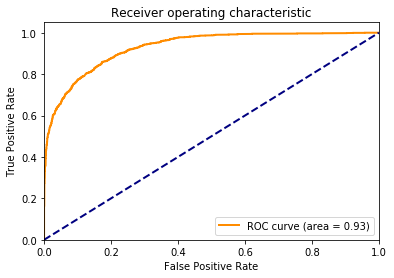

In [45]:

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[1], tpr[1], _ = roc_curve(Y_test[:, 0], y_pred[:, 0])
roc_auc[1] = auc(fpr[1], tpr[1])


# In[272]:


display(roc_auc)


# In[275]:


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [49]:
ans = []
cnt = 0
anss = []
class LSTM(object):
    def __init__(self):
        # define lower bound of benchmark function
        self.Lower = -10
        # define upper bound of benchmark function
        self.Upper = 10

    # function which returns evaluate function
    def function(self):
        def evalute(D,sol):
            global cnt
            cnt = cnt +1
            print(cnt,end=" ")
            from keras.models import Sequential
            from keras.layers import Dense
            from keras.layers import LSTM
            from keras.layers import Dropout,Bidirectional
            from keras.layers import Reshape,MaxPooling1D,Conv1D
            sol = np.array(sol)
            sol = sigmoid(sol)
            #display(sol)
            op = sol>=0.6
            X_tr = X_train[:,:,op]
            X_te = X_test[:,:,op]
            model = Sequential()
            model.add(LSTM(100, input_shape=(X_tr.shape[1],X_tr.shape[2]),return_sequences=True))
            model.add(LSTM(100))
            model.add(RepeatVector(X_train.shape[1]))
            model.add(LSTM(100))
            model.add(Dropout(0.2))
            #model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
            model.add(Dense(100,activation='tanh'))
            model.add(Dense(25,activation='tanh'))
            #model.add(Dense(20,activation='tanh'))
            model.add(Dense(10,activation='tanh'))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model.fit(X_tr, Y_train, validation_data=(X_te, Y_test), epochs=10,batch_size=500,verbose=0)
            scores = model.evaluate(X_te, Y_test, verbose=0)
            anss.append((scores[1],model,op))
            k = -1*scores[1]
            return k
        return evalute

In [65]:
cnt = 0
canss = []
class CLSTM(object):
    def __init__(self):
        # define lower bound of benchmark function
        self.Lower = -10
        # define upper bound of benchmark function
        self.Upper = 10

    # function which returns evaluate function
    def function(self):
        def evalute(D,sol):
            global cnt
            cnt = cnt +1
            print(cnt,end=" ")
            from keras.models import Sequential
            from keras.layers import Dense
            from keras.layers import LSTM
            from keras.layers import Dropout,Bidirectional
            from keras.layers import Reshape,MaxPooling1D,Conv1D
            sol = np.array(sol)
            sol = sigmoid(sol)
            #display(sol)
            op = sol>=0.6
            X_tr = X_train[:,:,op]
            X_te = X_test[:,:,op]
            model = Sequential()
            model.add(Conv1D(32, kernel_size=5, input_shape=(X_tr.shape[1],X_tr.shape[2]), activation='relu', padding='same',data_format="channels_last"))
            model.add(Conv1D(32, 5, activation='tanh', padding='same'))
            model.add(Conv1D(64, 5, activation='tanh', padding='same'))
            model.add(MaxPooling1D(pool_size=2,data_format="channels_first"))
            model.add(LSTM(100, activation='tanh',input_shape=(98,32),return_sequences=True))
            model.add(LSTM(100, activation='tanh'))
            model.add(RepeatVector(X_train.shape[1]))
            model.add(LSTM(100, activation='tanh'))
            model.add(Dropout(0.2))
            #model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
            model.add(Dense(100,activation='tanh'))
            model.add(Dense(25,activation='tanh'))
            #model.add(Dense(20,activation='tanh'))
            model.add(Dense(10,activation='tanh'))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model.fit(X_tr, Y_train, validation_data=(X_te, Y_test), epochs=30,batch_size=1000,verbose=0)
            scores = model.evaluate(X_te, Y_test, verbose=0)
            canss.append((scores[1],model,op))
            k = -1*scores[1]
            return k
        return evalute

In [51]:
from NiaPy.algorithms.basic import DifferentialEvolution
for i in range(2):
    algorithm = DifferentialEvolution(D=30, NP=60, nFES=5, benchmark=LSTM(),F=0.5,CR=0.3)
    best = algorithm.run()
    print(-1*best[1])
    ans.append(best)

1 2 3 4 5 0.6461701309157849
6 7 8 9 10 0.6457852194454231


In [66]:
cans = []
from NiaPy.algorithms.basic import DifferentialEvolution
for i in range(2):
    algorithm = DifferentialEvolution(D=30, NP=60, nFES=5, benchmark=CLSTM(),F=0.5,CR=0.3)
    best = algorithm.run()
    print(best)
    cans.append(best)

1 2 3 4 5 (array([ 7.10409012,  5.4655443 , -8.18811221, -9.58856128, -0.80597678,
        6.6614433 ,  6.30595258, -0.88323159, -5.29033642,  7.03726737,
        7.58864492,  1.81581154, -4.45720711,  4.50070379, -5.53086182,
       -0.05976827,  8.94940299, -8.59001897, -9.85442428,  7.5164749 ,
        0.96150499,  3.43564098,  8.62723089, -9.23343532,  3.49723198,
       -5.05359835,  9.65476702, -9.98522113, -5.47479348, -0.15041593]), -0.8032140108234062)
6 7 8 9 10 (array([ 9.09760465, -0.65519773,  6.76454536,  7.92323655, -7.30441041,
        8.72419301, -4.51018221,  2.3234028 ,  5.9468439 , -2.56032494,
       -5.9496551 ,  7.42878807, -6.45932497,  2.34849579,  5.6767397 ,
        5.63908497,  9.11709413, -6.970636  ,  8.26323863,  5.23164496,
        0.32492126,  1.03984125,  0.75971194, -0.56297159,  3.01261573,
       -1.9661239 ,  8.02929559, -6.49858965, -7.40066786, -8.82855621]), -0.7613548883297886)


In [67]:
cans

[(array([ 7.10409012,  5.4655443 , -8.18811221, -9.58856128, -0.80597678,
          6.6614433 ,  6.30595258, -0.88323159, -5.29033642,  7.03726737,
          7.58864492,  1.81581154, -4.45720711,  4.50070379, -5.53086182,
         -0.05976827,  8.94940299, -8.59001897, -9.85442428,  7.5164749 ,
          0.96150499,  3.43564098,  8.62723089, -9.23343532,  3.49723198,
         -5.05359835,  9.65476702, -9.98522113, -5.47479348, -0.15041593]),
  -0.8032140108234062),
 (array([ 9.09760465, -0.65519773,  6.76454536,  7.92323655, -7.30441041,
          8.72419301, -4.51018221,  2.3234028 ,  5.9468439 , -2.56032494,
         -5.9496551 ,  7.42878807, -6.45932497,  2.34849579,  5.6767397 ,
          5.63908497,  9.11709413, -6.970636  ,  8.26323863,  5.23164496,
          0.32492126,  1.03984125,  0.75971194, -0.56297159,  3.01261573,
         -1.9661239 ,  8.02929559, -6.49858965, -7.40066786, -8.82855621]),
  -0.7613548883297886)]

In [52]:
ans

[(array([ 3.96503913, -2.83911507, -6.90924131,  1.28111559, -5.51120616,
          6.14607681,  1.20636567,  9.85229218,  8.73378044, -0.08872211,
          2.85682498, -2.57058359,  9.13322094,  6.98376962, -2.46089277,
         -6.44426323,  2.55206632, -1.57968011, -3.29194525,  0.45224557,
          5.84437771, -1.24841962,  1.80514669,  6.67859048,  2.56392163,
          3.39566609, -3.93408144,  1.57659996, -2.15355805,  9.4888052 ]),
  -0.6461701309157849),
 (array([-3.45293689, -6.78337121,  4.88310528, -8.66431668,  1.63901829,
          0.6449484 ,  0.41002564, -0.33020454, -6.05450475,  4.49441198,
          9.13554131,  6.72669887, -1.94324704,  5.5783083 , -2.20377033,
         -9.30659368,  6.47747017,  8.88044337, -7.4830711 , -7.48540622,
         -4.63279081, -2.44705159,  4.71522517, -8.86504798, -0.31026645,
          3.74403689,  7.64367342, -5.10493536, -4.57786905, -6.20019522]),
  -0.6457852194454231)]

In [53]:
k = max(anss)
k

(0.6461701309157849,
 array([ True, False, False,  True, False,  True,  True,  True,  True,
        False,  True, False,  True,  True, False, False,  True, False,
        False,  True,  True, False,  True,  True,  True,  True, False,
         True, False,  True]))

In [58]:
og = k[2]
model = k[1]

In [56]:
X_teee = X_test[:,:,og]
X_teee.shape

(10392, 98, 18)

In [59]:
s = model.evaluate(X_teee,Y_test)
s

10392/10392 [==============================] - 11s 1ms/step


[0.6328939059957163, 0.6461701309157849]

In [60]:
y_pred = model.predict(X_teee)
y_pred

array([[0.42107782],
       [0.3130396 ],
       [0.4498382 ],
       ...,
       [0.29566073],
       [0.46119964],
       [0.30980664]], dtype=float32)

In [68]:
cans

[(array([ 7.10409012,  5.4655443 , -8.18811221, -9.58856128, -0.80597678,
          6.6614433 ,  6.30595258, -0.88323159, -5.29033642,  7.03726737,
          7.58864492,  1.81581154, -4.45720711,  4.50070379, -5.53086182,
         -0.05976827,  8.94940299, -8.59001897, -9.85442428,  7.5164749 ,
          0.96150499,  3.43564098,  8.62723089, -9.23343532,  3.49723198,
         -5.05359835,  9.65476702, -9.98522113, -5.47479348, -0.15041593]),
  -0.8032140108234062),
 (array([ 9.09760465, -0.65519773,  6.76454536,  7.92323655, -7.30441041,
          8.72419301, -4.51018221,  2.3234028 ,  5.9468439 , -2.56032494,
         -5.9496551 ,  7.42878807, -6.45932497,  2.34849579,  5.6767397 ,
          5.63908497,  9.11709413, -6.970636  ,  8.26323863,  5.23164496,
          0.32492126,  1.03984125,  0.75971194, -0.56297159,  3.01261573,
         -1.9661239 ,  8.02929559, -6.49858965, -7.40066786, -8.82855621]),
  -0.7613548883297886)]

In [74]:
k = max(canss)
k

(0.8032140108234062,
 array([ True,  True, False, False, False,  True,  True, False, False,
         True,  True,  True, False,  True, False, False,  True, False,
        False,  True,  True,  True,  True, False,  True, False,  True,
        False, False, False]))

In [75]:
og = k[2]
model = k[1]

In [76]:
X_teee = X_test[:,:,og]
X_teee.shape

(10392, 98, 15)

In [77]:
s = model.evaluate(X_teee,Y_test)
s

10392/10392 [==============================] - 13s 1ms/step


[0.4172374527210268, 0.8032140108234062]

In [78]:
y_pred = model.predict(X_teee)
y_pred

array([[0.9771807 ],
       [0.09660529],
       [0.11537388],
       ...,
       [0.2606267 ],
       [0.54082775],
       [0.76358354]], dtype=float32)

In [79]:
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd;
import numpy as np;
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, f1_score,precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [80]:
score = 1.0 - roc_auc_score(Y_test, y_pred)



display(score)


f_score=f1_score(Y_test,y_pred.round())

display(f_score)





prfs=precision_recall_fscore_support(Y_test,y_pred.round())


display(prfs)




f_score_micro=f1_score(Y_test,y_pred.round(),average='micro')
f_score_macro=f1_score(Y_test,y_pred.round(),average='macro')

display(f_score_micro)
display(f_score_macro)




cf=confusion_matrix(Y_test,y_pred.round())

display(cf)




print("AUC : "+str(1.0 - score)+",  Score/Loss : "+str(score)+", F1_Score_average: "+str(f_score)+", Precision, Recall, F1_score, Support: "+str(prfs))
print("F1_score_micro: "+str(f_score_micro))
print("F1_score_macro: "+str(f_score_macro))
print("Confusion Matrix")
print(cf)
print("END\n\n")



0.126270834356208

0.6957298021127809

(array([0.79211706, 0.83321454]),
 array([0.92774433, 0.59719029]),
 array([0.85458295, 0.6957298 ]),
 array([6477, 3915]))

0.8032140107775212

0.7751563751373121

array([[6009,  468],
       [1577, 2338]])

AUC : 0.873729165643792,  Score/Loss : 0.126270834356208, F1_Score_average: 0.6957298021127809, Precision, Recall, F1_score, Support: (array([0.79211706, 0.83321454]), array([0.92774433, 0.59719029]), array([0.85458295, 0.6957298 ]), array([6477, 3915]))
F1_score_micro: 0.8032140107775212
F1_score_macro: 0.7751563751373121
Confusion Matrix
[[6009  468]
 [1577 2338]]
END




{1: 0.873729165643792}

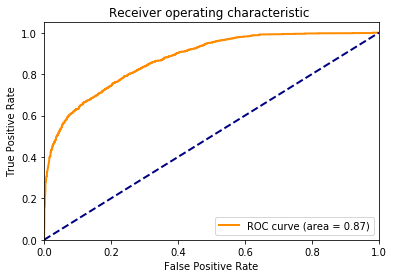

In [82]:



# In[271]:


fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[1], tpr[1], _ = roc_curve(Y_test[:, 0], y_pred[:, 0])
roc_auc[1] = auc(fpr[1], tpr[1])


# In[272]:


display(roc_auc)


# In[275]:


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()